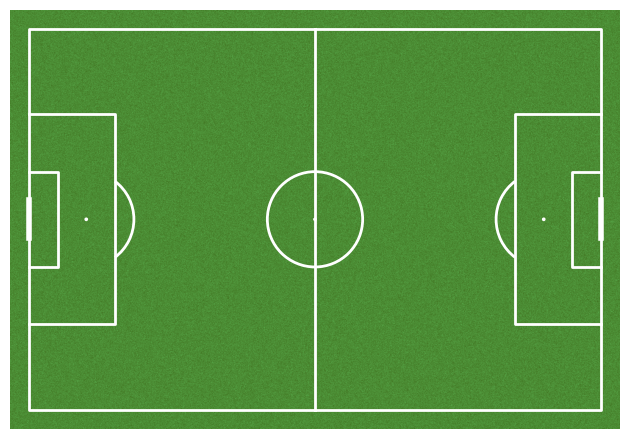

In [7]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
plt.show() 

In [8]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("aleespinosa/soccer-match-event-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17


In [9]:
# List files in the dataset directory
import os

dataset_path = "/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17"

files = os.listdir(dataset_path)
print(files)


['matches_Germany.csv', 'matches_Spain.csv', 'events_Spain.csv', 'labels.csv', 'competitions.csv', 'teams.csv', 'referees.csv', 'matches_European_Championship.csv', 'coaches.csv', 'matches_Italy.csv', 'events_Italy.csv', 'matches_France.csv', 'events_England.csv', 'events_World_Cup.csv', 'matches_World_Cup.csv', 'players.csv', 'games.csv', 'events_Germany.csv', 'playerank.csv', 'events_France.csv', 'features.csv', 'matches_England.csv', 'player_games.csv', 'tags2name.csv', 'eventid2name.csv', 'events_European_Championship.csv', 'actions.csv']


In [ ]:

import pandas as pd

# Loading the data from the Spain matches CSV
matches = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/matches_Spain.csv")


In [33]:
import pandas as pd

# Loading the data from the teams CSV
teams = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/teams.csv")


# Finding Real Madrid team ID
real_madrid_id = teams[teams['name'] == 'Real Madrid']['wyId'].values[0]
print(real_madrid_id)



675


In [ ]:
# Finding matches that involve Real Madrid

real_madrid_id = 675 

# Filter matches where Real Madrid ID is either team1 or team2
rm_matches = matches[
    (matches['team1.teamId'] == real_madrid_id) | 
    (matches['team2.teamId'] == real_madrid_id)
]

# Show the match IDs
print(rm_matches['wyId'])



4      2565927
12     2565912
20     2565882
23     2565907
38     2565891
54     2565876
60     2565867
73     2565852
87     2565847
90     2565836
108    2565818
115    2565812
129    2565799
137    2565796
140    2565707
142    2565780
156    2565772
166    2565766
178    2565749
184    2565738
198    2565733
202    2565723
213    2565711
237    2565695
245    2565687
257    2565673
265    2565664
270    2565657
284    2565644
292    2565633
307    2565619
310    2565609
328    2565598
334    2565596
341    2565583
358    2565571
360    2565564
372    2565555
Name: wyId, dtype: int64


In [ ]:
import pandas as pd

# Loading all event data for Spain games
events = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/events_Spain.csv")

# See the first few rows and column names
print(events.head())
print(events.columns)


   eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]      3542   
1        8  Simple pass  [{'id': 1801}]    274435   
2        8  Simple pass  [{'id': 1801}]    364860   
3        8  Simple pass  [{'id': 1801}]      3534   
4        8  Simple pass  [{'id': 1801}]      3695   

                                  positions  matchId eventName  teamId  \
0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]  2565548      Pass     682   
1  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]  2565548      Pass     682   
2  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]  2565548      Pass     682   
3  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]  2565548      Pass     682   
4  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]  2565548      Pass     682   

  matchPeriod   eventSec  subEventId         id tagsList  pos_orig_y  \
0          1H   2.994582        85.0  180864419   [1801]          61   
1          1H   3.137020        85.0  180864418   [1801]          50   
2          1H   6.70

In [ ]:
# Isolating events for Real Madrid games
rm_events = events[events['matchId'].isin(rm_matches['wyId'])]

# Sanity Check: see the first few events
print(rm_events.head())


       eventId subEventName            tags  playerId  \
11178        8  Simple pass  [{'id': 1801}]      3321   
11179        8  Simple pass  [{'id': 1801}]     14723   
11180        8  Simple pass  [{'id': 1801}]      8287   
11181        8  Simple pass  [{'id': 1801}]      4501   
11182        8  Simple pass  [{'id': 1801}]      8287   

                                      positions  matchId eventName  teamId  \
11178  [{'y': 51, 'x': 48}, {'y': 36, 'x': 40}]  2565555      Pass     675   
11179  [{'y': 36, 'x': 40}, {'y': 70, 'x': 36}]  2565555      Pass     675   
11180  [{'y': 70, 'x': 36}, {'y': 95, 'x': 33}]  2565555      Pass     675   
11181  [{'y': 95, 'x': 33}, {'y': 68, 'x': 38}]  2565555      Pass     675   
11182  [{'y': 68, 'x': 38}, {'y': 36, 'x': 26}]  2565555      Pass     675   

      matchPeriod   eventSec  subEventId         id tagsList  pos_orig_y  \
11178          1H   1.818886        85.0  180467997   [1801]          36   
11179          1H   5.179896        

In [34]:
# Saving event data for all Real Madrid matches
rm_events.to_csv("RealMadrid_events.csv", index=False)


In [ ]:
# Isolated only Real Madrid event data from those matches
real_madrid_id = 675  

rm_only_events = rm_events[rm_events['teamId'] == real_madrid_id]

# Save the isolated Real Madrid event data to CSV
rm_only_events.to_csv("RealMadrid_only_events.csv", index=False)


In [35]:
# Filter only shots (used the CSV file to see the eventId for shots is 10)
shots = rm_only_events[rm_only_events['eventId'] == 10]

# See how many shots there are
print(f"Total shots: {len(shots)}")


Total shots: 629


In [36]:
import pandas as pd

# Load the players CSV
players = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/players.csv")

# Find Cristiano Ronaldo's player ID
ronaldo_id = players[players['shortName'].str.contains('Cristiano Ronaldo', case=False, na=False)]['wyId'].values[0]
print("Cristiano Ronaldo's player ID:", ronaldo_id)


Cristiano Ronaldo's player ID: 3322


In [37]:
# Filter shots taken by Cristiano Ronaldo from the total shots
ronaldo_shots = shots[shots['playerId'] == ronaldo_id]

# Quick check to check player ID filter worked
print(ronaldo_shots.head())
print(f"Total shots by Ronaldo: {len(ronaldo_shots)}")


       eventId subEventName  \
76414       10         Shot   
76589       10         Shot   
76959       10         Shot   
77121       10         Shot   
77207       10         Shot   

                                                    tags  playerId  \
76414  [{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...      3322   
76589  [{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...      3322   
76959  [{'id': 1901}, {'id': 402}, {'id': 201}, {'id'...      3322   
77121  [{'id': 403}, {'id': 201}, {'id': 1214}, {'id'...      3322   
77207  [{'id': 1901}, {'id': 402}, {'id': 2101}, {'id...      3322   

                                    positions  matchId eventName  teamId  \
76414  [{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]  2565596      Shot     675   
76589  [{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]  2565596      Shot     675   
76959  [{'y': 66, 'x': 86}, {'y': 0, 'x': 0}]  2565596      Shot     675   
77121  [{'y': 48, 'x': 88}, {'y': 0, 'x': 0}]  2565596      Shot     675   
77207  [{'y'

In [38]:
# Creating CSV file for Cristiano Ronaldo's shot data
ronaldo_shots.to_csv("cristiano_ronaldo_shots.csv", index=False)


In [41]:
import pandas as pd

# Load the dataset
ronaldo_shots = pd.read_csv("cristiano_ronaldo_shots.csv")

# Check columns
print(ronaldo_shots.columns)


Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'tagsList', 'pos_orig_y', 'pos_orig_x', 'pos_dest_y', 'pos_dest_x'],
      dtype='object')


In [ ]:
import pandas as pd

# Attempting to find tags numbers for on and off target shots
# Load the tag reference file
tags_df = pd.read_csv("/Users/mac/.cache/kagglehub/datasets/aleespinosa/soccer-match-event-dataset/versions/17/tags2name.csv")

# Look at columns
print(tags_df.columns)

# Search for keywords likely related to shots
keywords = ["shot", "goal", "target", "post", "crossbar", "save", "blocked"]

for word in keywords:
    print(f"\n=== Tags related to '{word}' ===")
    display(tags_df[tags_df["Label"].str.contains(word, case=False, na=False)])


Index(['Tag', 'Label', 'Description'], dtype='object')

=== Tags related to 'shot' ===


,Tag,Label,Description



=== Tags related to 'goal' ===


,Tag,Label,Description
0,101,Goal,Goal
1,102,own_goal,Own goal



=== Tags related to 'target' ===


,Tag,Label,Description



=== Tags related to 'post' ===


,Tag,Label,Description



=== Tags related to 'crossbar' ===


,Tag,Label,Description



=== Tags related to 'save' ===


,Tag,Label,Description



=== Tags related to 'blocked' ===


,Tag,Label,Description
11,2101,blocked,Blocked


In [ ]:
import ast
import pandas as pd

# Load Ronaldo's shots data
ronaldo_shots = pd.read_csv("cristiano_ronaldo_shots.csv")

# Attempting to find tags numbers for on and off target shots
ronaldo_shots["tags_parsed"] = ronaldo_shots["tags"].apply(ast.literal_eval)

# Flatten all tag IDs into one list
all_tags = [t["id"] for tags in ronaldo_shots["tags_parsed"] for t in tags]

# Get unique tag IDs to find tags for on and off target shots
tag_counts = pd.Series(all_tags).value_counts()
print(tag_counts)


201     133
1802     83
402      80
1801     68
401      42
403      29
2101     26
101      23
1201     19
1901     15
1210     13
1215     13
1203     12
1202     11
1216     11
1205     11
1212      6
1214      5
1207      5
1204      4
1206      4
1218      3
1211      2
1213      2
1223      1
1209      1
1208      1
1222      1
1401      1
Name: count, dtype: int64


In [ ]:
import ast
import pandas as pd

# Load the data
ronaldo_shots = pd.read_csv("cristiano_ronaldo_shots.csv")

# Convert tags from string to list
ronaldo_shots["tags_parsed"] = ronaldo_shots["tags"].apply(ast.literal_eval)

# Define classification of shot outcomes based on tag IDs with common Wyscout codes
def classify_shot(tags):
    tag_ids = [t["id"] for t in tags]
    if 101 in tag_ids or 1201 in tag_ids:
        return "Goal"
    elif 401 in tag_ids:
        return "On Target"
    elif 402 in tag_ids:
        return "Off Target"
    elif 403 in tag_ids or 2101 in tag_ids:
        return "Blocked"
    else:
        return "Unknown"

ronaldo_shots["shot_outcome"] = ronaldo_shots["tags_parsed"].apply(classify_shot)

# Save to a new file including shot outcomes for the final dataset!!
ronaldo_shots.to_csv("cristiano_ronaldo_shots_with_outcomes.csv", index=False)


In [44]:
ronaldo_shots_final = pd.read_csv("cristiano_ronaldo_shots_with_outcomes.csv")

In [45]:
# Change name of ipynb file

import os

# Rename file (old name → new name)
os.rename("Project 2 practice.ipynb", "Dataset_filtering.ipynb")
